In [2]:
import xarray as xr 
import json 
import pandas as pd 
import csv 
import glob 
import os 
import matplotlib.pyplot as plt 

In [3]:
from xarray_utils import csv_dims_to_lists, xarray_results_dataset

In [4]:
results_dir = "/home/murloc/Bureau/results"
phi_3D_results = glob.glob(results_dir + '/rec_Phi3D_*')
phi_3D_results.sort() 

In [5]:
images_dir = '/home/murloc/Bureau/CEA_stage/Images/'

In [6]:
phi_3D_results

['/home/murloc/Bureau/results/rec_Phi3D_1',
 '/home/murloc/Bureau/results/rec_Phi3D_2',
 '/home/murloc/Bureau/results/rec_Phi3D_3',
 '/home/murloc/Bureau/results/rec_Phi3D_4',
 '/home/murloc/Bureau/results/rec_Phi3D_5']

In [7]:
xarray_datasets = [] 

for rec_dir in phi_3D_results:
    methods, data, diags = csv_dims_to_lists(rec_dir + '/') 
    ds = xarray_results_dataset(rec_dir + '/', data_dimension=3) 
    xarray_datasets.append(ds) 


In [8]:
full_ds = xr.concat(xarray_datasets, dim='data') 

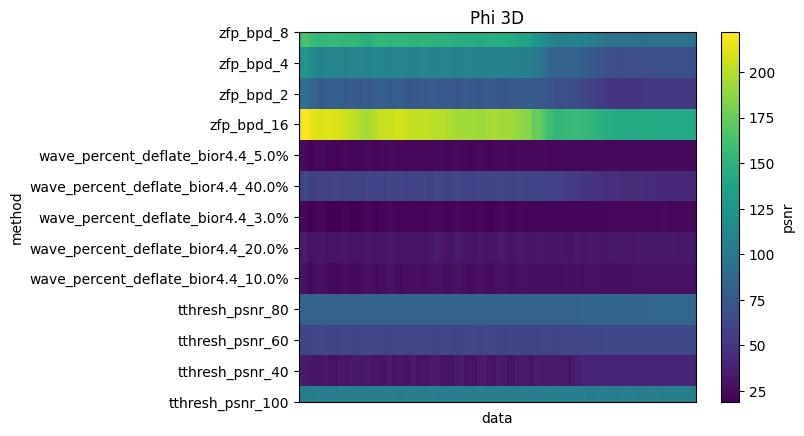

In [9]:
p = full_ds.psnr.sel(diag='identity').plot()
p.axes.get_xaxis().set_ticks([]) 
plt.title('Phi 3D')
plt.savefig(images_dir + 'Phi3D_psnr.png', bbox_inches='tight') 

Text(0.5, 1.0, 'Phi 3D')

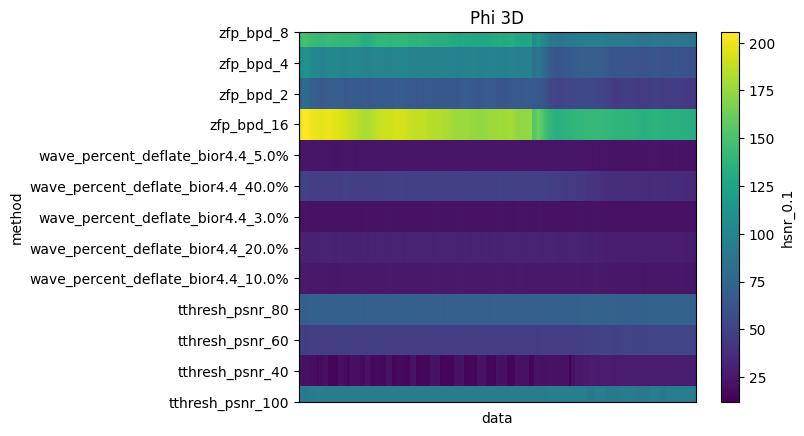

In [10]:
p = full_ds["hsnr_0.1"].sel(diag='identity').plot()
p.axes.get_xaxis().set_ticks([]) 
plt.title('Phi 3D')

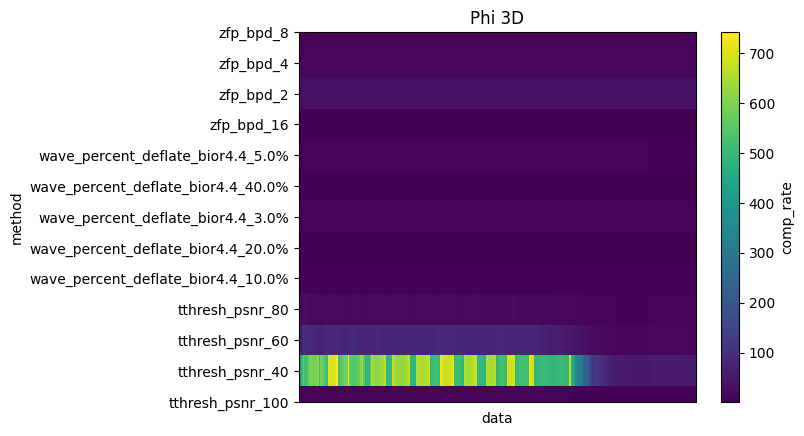

In [11]:
p = full_ds.comp_rate.plot()
p.axes.get_xaxis().set_ticks([]) 
plt.title('Phi 3D')
plt.savefig(images_dir +'Phi3D_compression_rates.png', bbox_inches='tight')

Text(0.5, 1.0, 'Phi 3D')

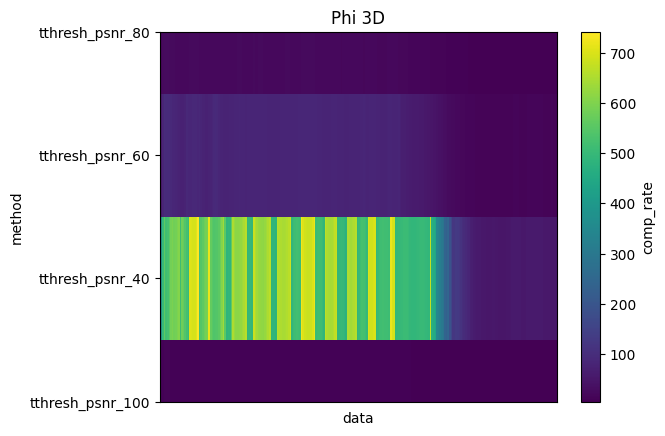

In [12]:
p = full_ds.comp_rate[:4].plot()
p.axes.get_xaxis().set_ticks([]) 
plt.title('Phi 3D') 

In [13]:
full_ds.comp_rate[:4].mean(dim='data') 

<xarray.DataArray 'comp_rate' (method: 4)>
array([  8.48422612, 428.4069624 ,  59.4063184 ,  17.0881988 ])
Coordinates:
  * method   (method) <U34 'tthresh_psnr_100' ... 'tthresh_psnr_80'

[]

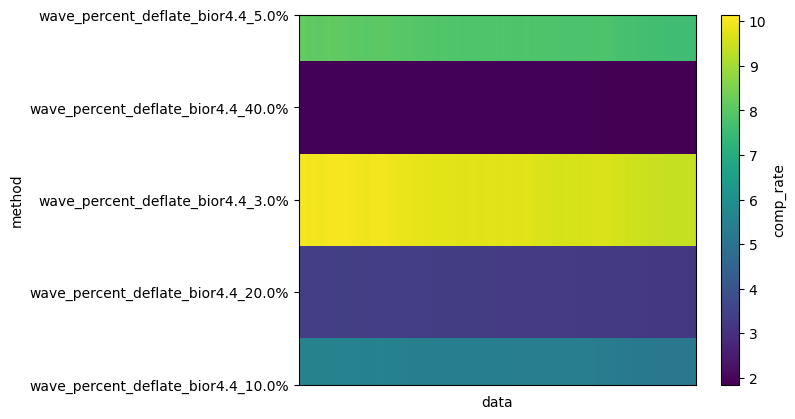

In [14]:
p = full_ds.comp_rate[4:9].plot()
p.axes.get_xaxis().set_ticks([]) 

[]

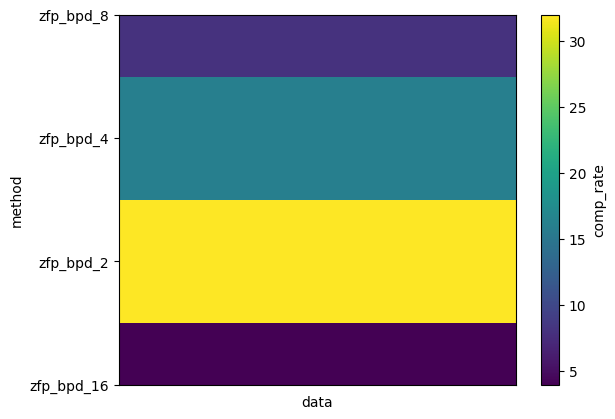

In [15]:
p = full_ds.comp_rate[9:].plot()
p.axes.get_xaxis().set_ticks([]) 

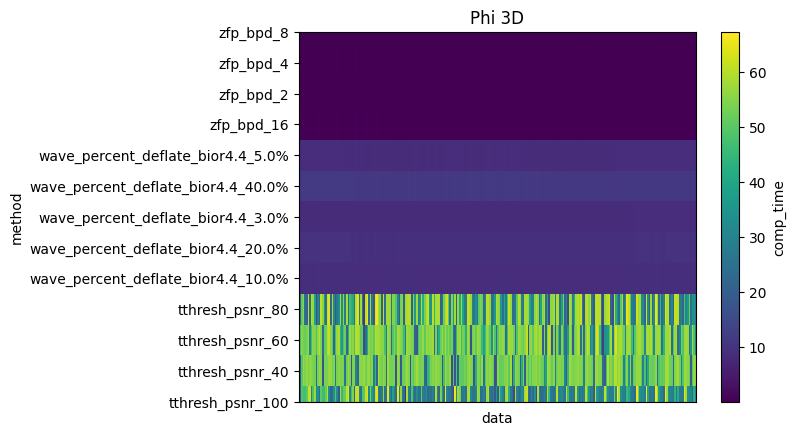

In [16]:
p = full_ds.comp_time.plot()
p.axes.get_xaxis().set_ticks([])
plt.title('Phi 3D')
plt.savefig(images_dir + 'Phi3D_compression_time.png') 

[]

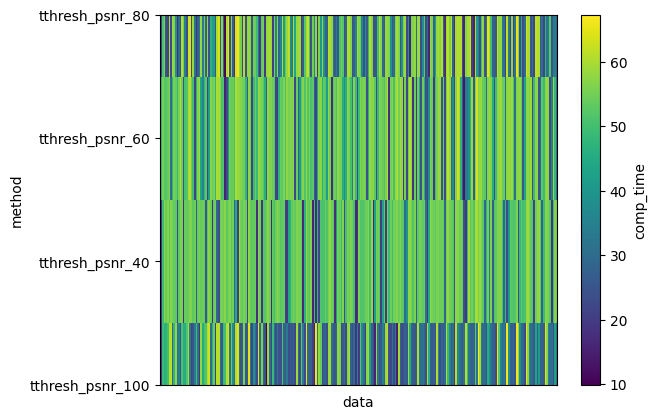

In [17]:
p = full_ds.comp_time[:4].plot()
p.axes.get_xaxis().set_ticks([])

[]

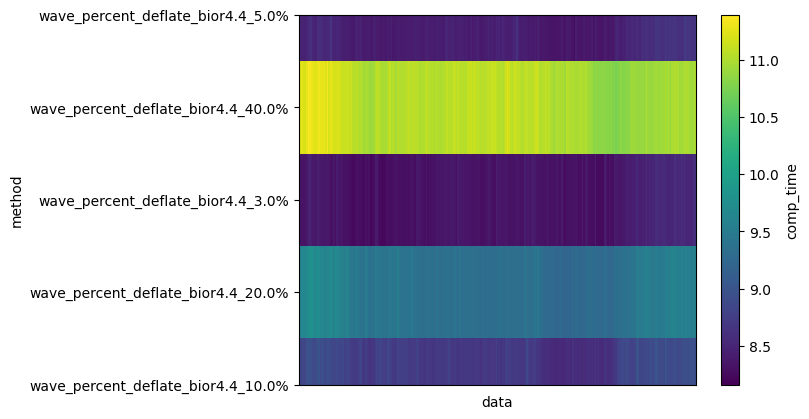

In [18]:
p = full_ds.comp_time[4:9].plot()
p.axes.get_xaxis().set_ticks([])

[]

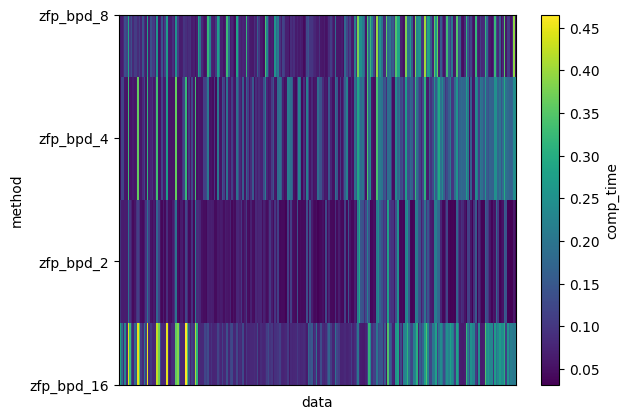

In [19]:
p = full_ds.comp_time[9:].plot()
p.axes.get_xaxis().set_ticks([])

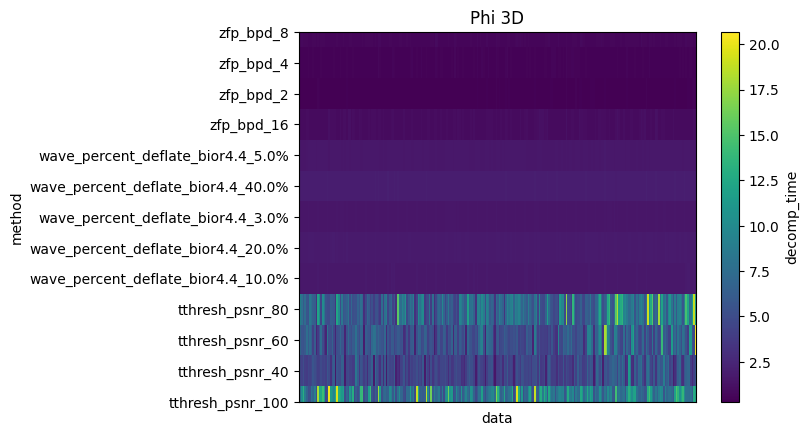

In [20]:
p = full_ds.decomp_time.plot() 
p.axes.get_xaxis().set_ticks([])
plt.title('Phi 3D') 
plt.savefig(images_dir + 'Phi3D_decompression_time') 

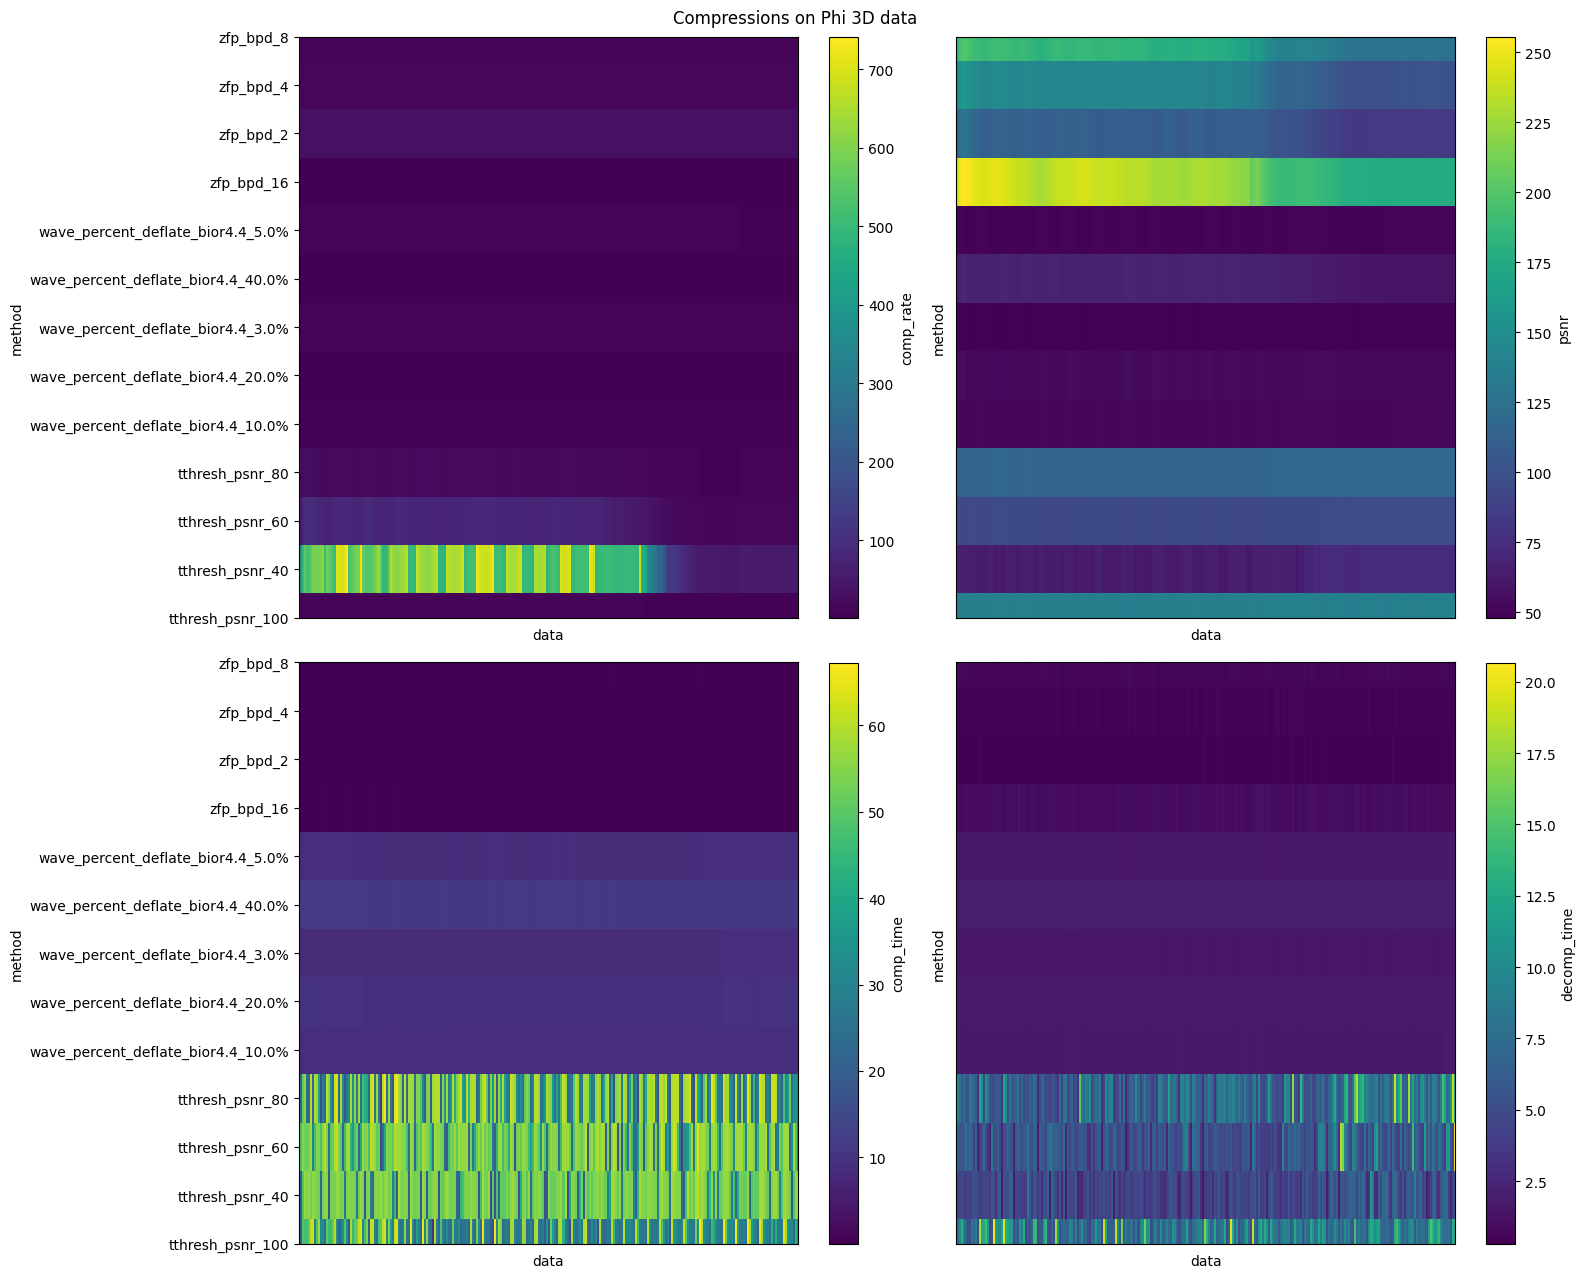

In [21]:
fig, axs = plt.subplots(2, 2, figsize=[16,13])

axs[0,0].axes.get_xaxis().set_ticks([]) 
full_ds.comp_rate.plot(ax=axs[0,0]) 
axs[0,1].axes.get_xaxis().set_ticks([])
full_ds.psnr.mean(dim='diag').plot(ax=axs[0,1])
axs[1,0].axes.get_xaxis().set_ticks([]) 
full_ds.comp_time.plot(ax=axs[1,0]) 
axs[1,1].axes.get_xaxis().set_ticks([])
full_ds.decomp_time.plot(ax=axs[1,1])

axs[0,1].axes.get_yaxis().set_ticks([]) 
axs[1,1].axes.get_yaxis().set_ticks([])

fig.suptitle('Compressions on Phi 3D data')
fig.tight_layout() 

plt.savefig(images_dir + 'global_compression_results_Phi3D.png')


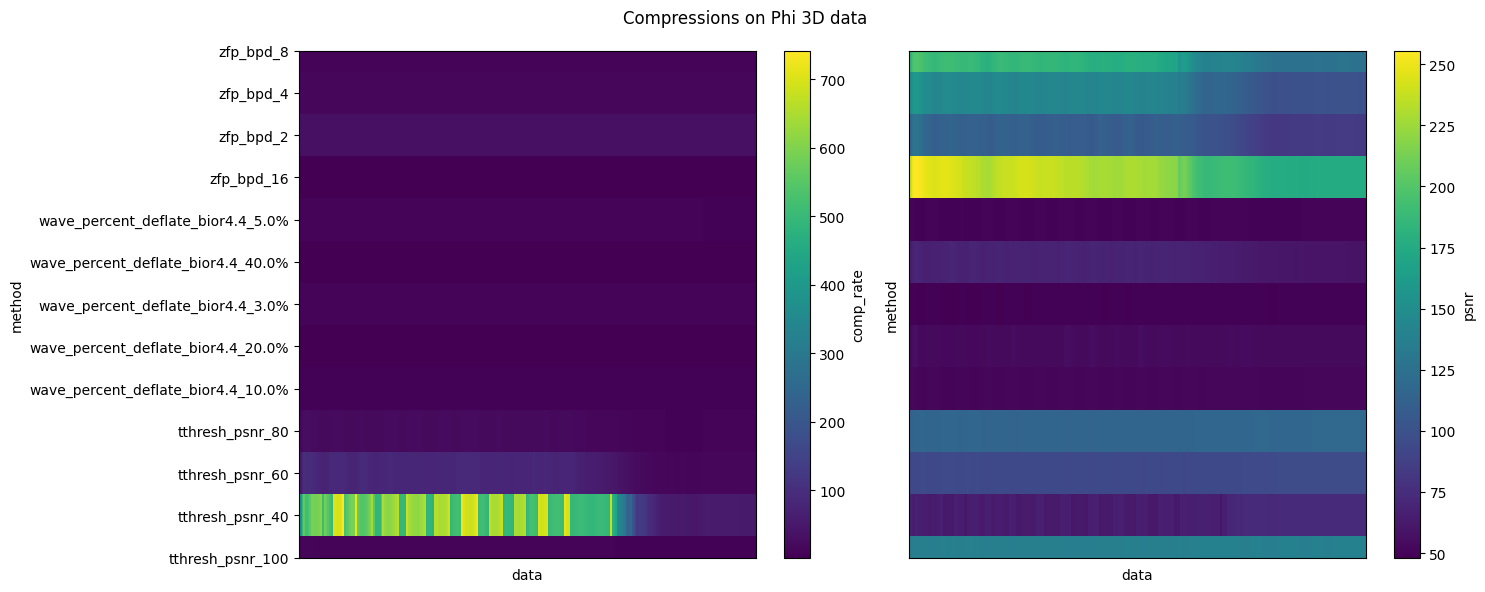

In [23]:
fig, axs = plt.subplots(1, 2, figsize=[15,6])

axs[0].axes.get_xaxis().set_ticks([]) 
full_ds.comp_rate.plot(ax=axs[0]) 
axs[1].axes.get_xaxis().set_ticks([])
full_ds.psnr.mean(dim='diag').plot(ax=axs[1])

axs[1].axes.get_yaxis().set_ticks([]) 

fig.suptitle(r'Compressions on Phi 3D data')
fig.tight_layout() 

plt.savefig(images_dir + 'commpression_and_quality_phi3D.png')